In [2]:
from sklearn.cluster import KMeans
from itertools import combinations
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

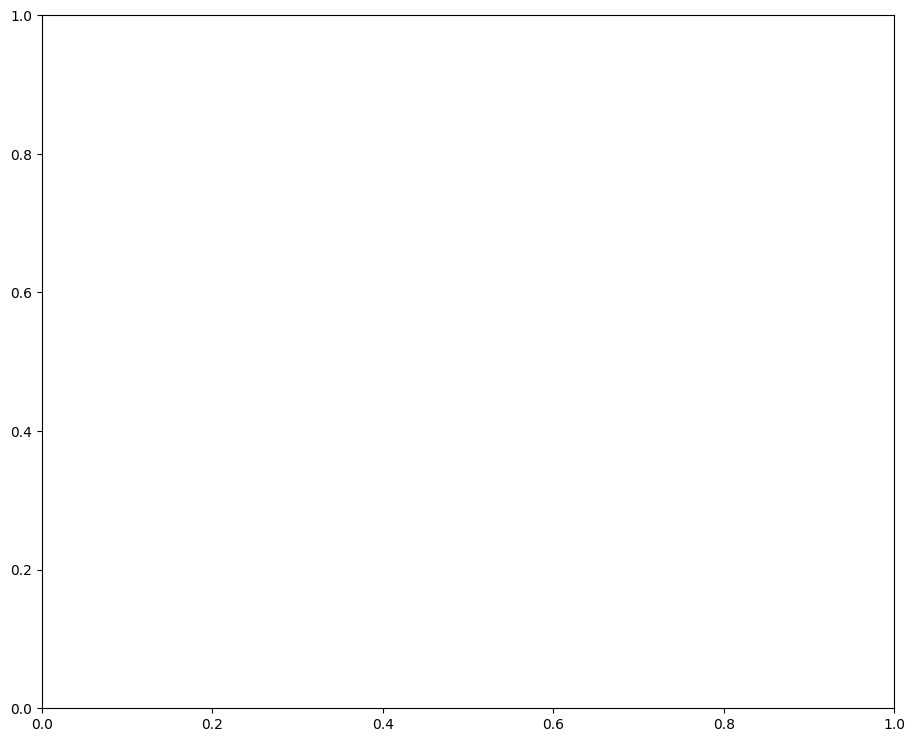

In [44]:
metricList=[]
df = pd.read_csv(r"****************************************")
for metric in df:
    metricList.append(metric)
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale,columns=metricList)
df_scale
corr=df_scale.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


<Axes: >

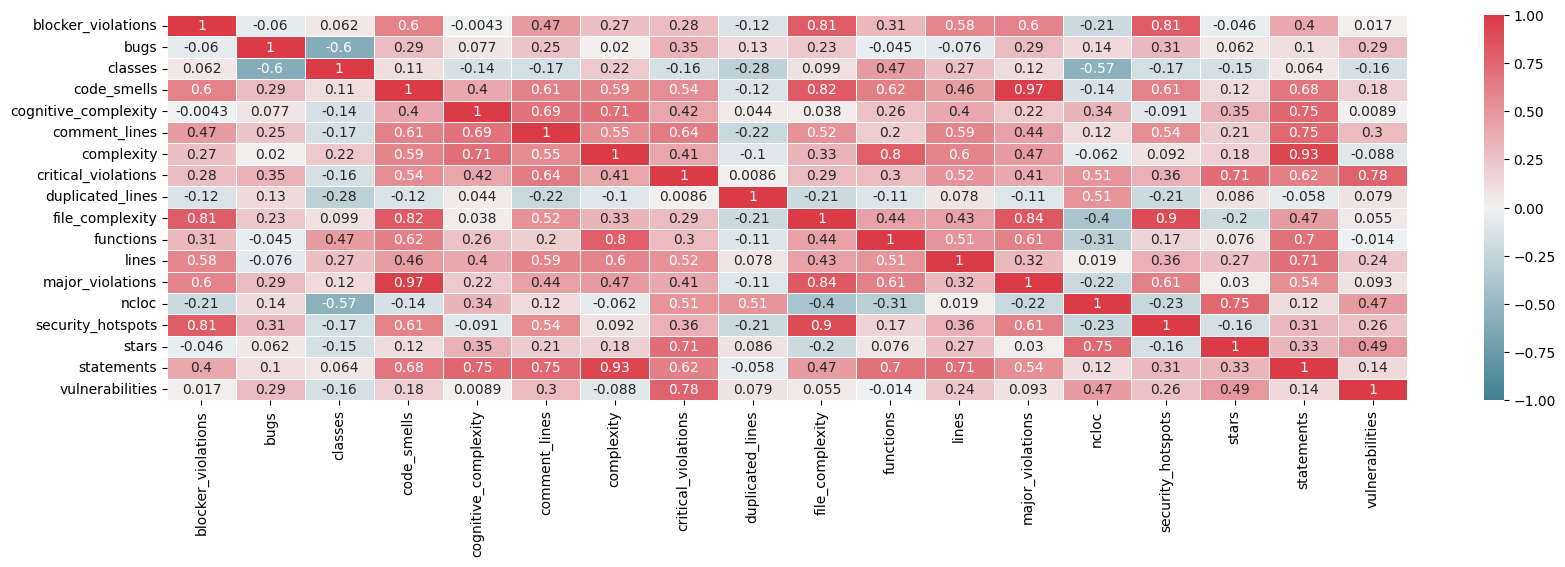

In [45]:
plt.figure(figsize=(20,5))
sns.heatmap(
    corr,          # The data to plot
    #mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=False,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
)

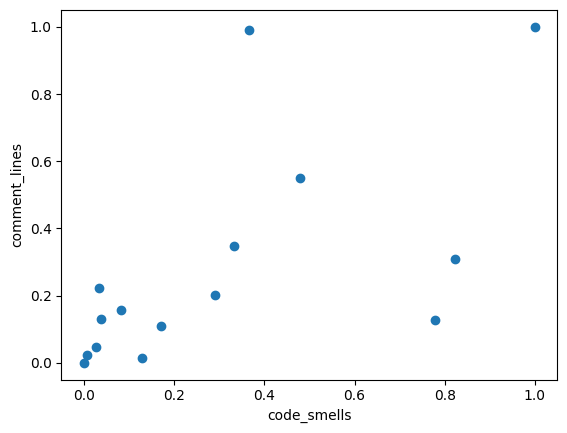

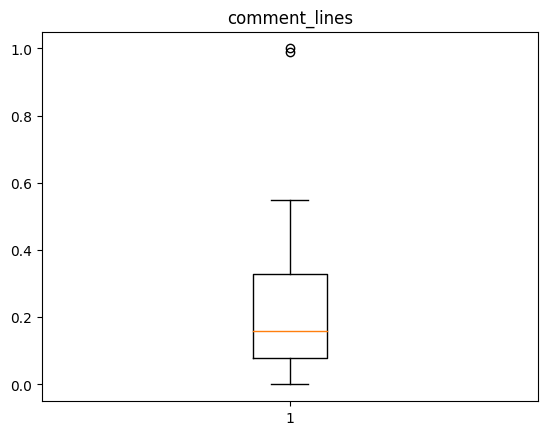

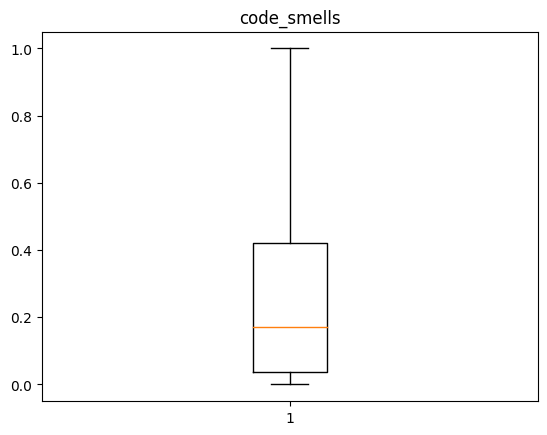

,blocker_violations,bugs,classes,code_smells,cognitive_complexity,comment_lines,complexity,critical_violations,duplicated_lines,file_complexity,functions,lines,major_violations,ncloc,security_hotspots,stars,statements,vulnerabilities
0,0.000000,0.626560,0.729127,0.332307,0.027059,0.347839,0.333189,0.572316,0.000000,0.144578,0.579991,0.557808,0.275520,0.009773,0.207135,0.001300,0.322779,1.000000
1,0.201106,0.355807,0.703762,0.777756,0.472923,0.127271,0.721316,0.151349,0.318691,0.361645,0.932542,0.421561,0.864993,0.007281,0.114691,0.016244,0.621383,0.000000
2,0.353951,0.250491,0.505910,0.291154,0.236678,0.201287,1.000000,0.260554,0.095091,0.111497,1.000000,0.536502,0.300116,0.093214,0.085861,0.000650,0.812262,0.000000
3,0.000000,1.000000,0.060619,0.038269,0.058718,0.130127,0.122559,0.153732,0.045064,0.031585,0.110685,0.000000,0.102139,0.152197,0.134333,0.092268,0.015548,0.045600
4,0.000000,0.178644,0.614700,0.027057,0.012694,0.047507,0.112566,0.025274,0.000000,0.031701,0.226747,0.152121,0.059874,0.025484,0.013540,0.005198,0.034793,0.000000
5,0.000000,0.113943,0.737604,0.033555,0.200308,0.223820,0.535772,0.003091,0.082921,0.044110,0.601914,0.495651,0.053811,0.074901,0.027789,0.006823,0.501060,0.000000
6,0.240240,0.000000,1.000000,0.128261,0.004970,0.013658,0.304203,0.069913,0.000000,0.132746,0.278594,0.319150,0.135572,0.004291,0.041583,0.000650,0.179936,0.000000
7,0.183528,0.811769,0.589384,0.822093,0.210166,0.309469,0.750961,0.272086,0.209038,0.403260,0.790288,0.475070,0.916229,0.009039,0.141028,0.000000,0.642767,0.000000
8,0.029477,0.621487,0.038440,0.082267,0.199521,0.158340,0.184054,0.281354,1.000000,0.002413,0.089407,0.280536,0.082165,0.740276,0.095101,0.009097,0.259913,0.414201
9,1.000000,0.589750,0.365205,1.000000,0.229600,1.000000,0.637343,0.619500,0.000000,1.000000,0.634223,1.000000,1.000000,0.000000,1.000000,0.000650,0.941956,0.403393


In [51]:
km=KMeans(n_clusters=3)
dataDropped = df_scale.drop([9,11])
first='code_smells'
second='comment_lines'
F=df_scale[first]
S=df_scale[second]
plt.scatter(F, S)
plt.xlabel(first)
plt.ylabel(second)
plt.show()
plt.boxplot(df_scale[second]) 
plt.title(second) 
plt.show()  
plt.boxplot(df_scale[first]) 
plt.title(first) 
plt.show()
df_scale

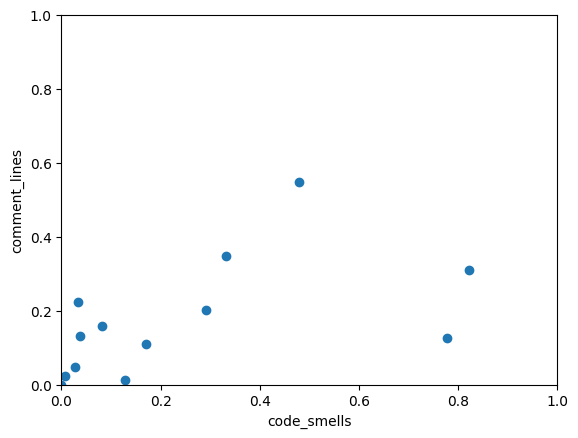

In [52]:
F=dataDropped[first]
S=dataDropped[second]
plt.scatter(F, S)
plt.xlabel(first)
plt.ylabel(second)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

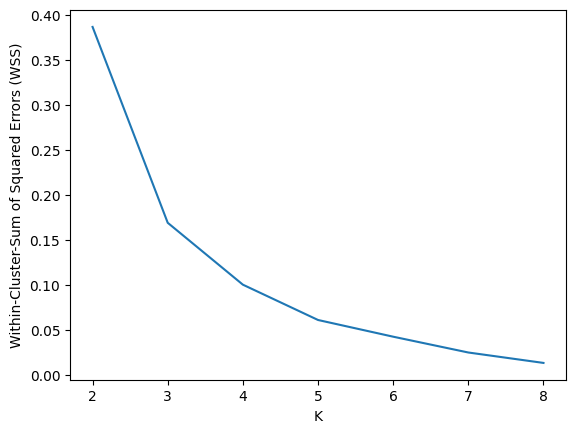

In [53]:

y_predicted = km.fit_predict(dataDropped[[first,second]])
K=range(2,9)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(dataDropped[[first,second]])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

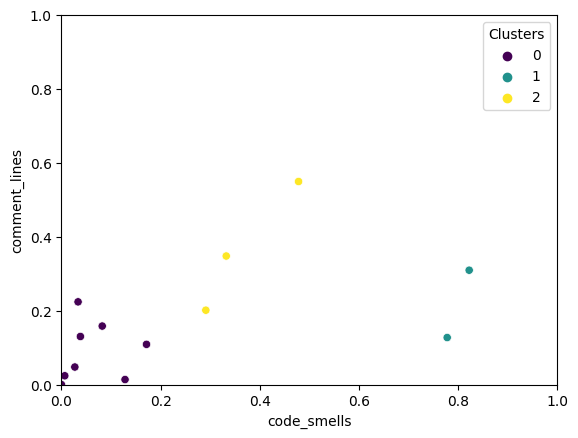

,blocker_violations,bugs,classes,code_smells,cognitive_complexity,comment_lines,complexity,critical_violations,duplicated_lines,file_complexity,functions,lines,major_violations,ncloc,security_hotspots,stars,statements,vulnerabilities,Clusters
0,0.000000,0.626560,0.729127,0.332307,0.027059,0.347839,0.333189,0.572316,0.000000,0.144578,0.579991,0.557808,0.275520,0.009773,0.207135,0.001300,0.322779,1.000000,2
1,0.201106,0.355807,0.703762,0.777756,0.472923,0.127271,0.721316,0.151349,0.318691,0.361645,0.932542,0.421561,0.864993,0.007281,0.114691,0.016244,0.621383,0.000000,1
2,0.353951,0.250491,0.505910,0.291154,0.236678,0.201287,1.000000,0.260554,0.095091,0.111497,1.000000,0.536502,0.300116,0.093214,0.085861,0.000650,0.812262,0.000000,2
3,0.000000,1.000000,0.060619,0.038269,0.058718,0.130127,0.122559,0.153732,0.045064,0.031585,0.110685,0.000000,0.102139,0.152197,0.134333,0.092268,0.015548,0.045600,0
4,0.000000,0.178644,0.614700,0.027057,0.012694,0.047507,0.112566,0.025274,0.000000,0.031701,0.226747,0.152121,0.059874,0.025484,0.013540,0.005198,0.034793,0.000000,0
5,0.000000,0.113943,0.737604,0.033555,0.200308,0.223820,0.535772,0.003091,0.082921,0.044110,0.601914,0.495651,0.053811,0.074901,0.027789,0.006823,0.501060,0.000000,0
6,0.240240,0.000000,1.000000,0.128261,0.004970,0.013658,0.304203,0.069913,0.000000,0.132746,0.278594,0.319150,0.135572,0.004291,0.041583,0.000650,0.179936,0.000000,0
7,0.183528,0.811769,0.589384,0.822093,0.210166,0.309469,0.750961,0.272086,0.209038,0.403260,0.790288,0.475070,0.916229,0.009039,0.141028,0.000000,0.642767,0.000000,1
8,0.029477,0.621487,0.038440,0.082267,0.199521,0.158340,0.184054,0.281354,1.000000,0.002413,0.089407,0.280536,0.082165,0.740276,0.095101,0.009097,0.259913,0.414201,0
10,0.371026,0.208867,0.699172,0.000000,0.000000,0.000000,0.220196,0.000000,0.489412,0.009923,0.360322,0.920483,0.000000,0.098364,0.000000,0.023067,0.101779,0.000000,0


In [54]:

dataDropped['Clusters'] = km.labels_
sns.scatterplot(x=first, y=second,hue = 'Clusters',  data=dataDropped,palette='viridis')

X=dataDropped[first]
Y=dataDropped[second]
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()
dataDropped

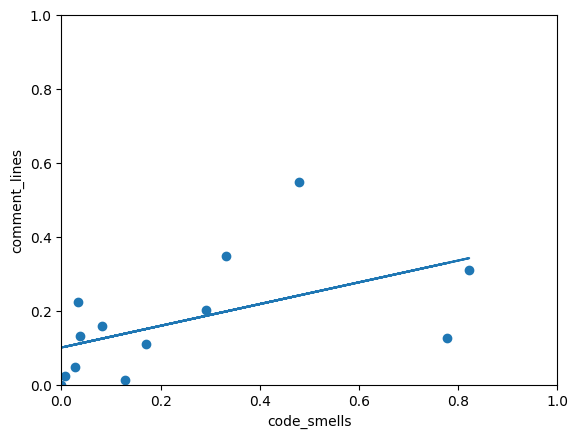

In [55]:
plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.xlabel(first)
plt.ylabel(second)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

In [16]:
listComb = list(combinations(metricList, 2))
print(len(listComb))
print(listComb[0][0])
count=1
plt.figure(figsize = (100,80))
for n in listComb:
    plt.subplot(10,10, count)
    plt.grid()
    y_predicted = km.fit_predict(df_scale[[n[0],n[1]]])
    df_scale['Clusters'] = km.labels_
    #sns.set(rc={"figure.figsize":(8, 5)})
    sns.scatterplot(x=n[0], y=n[1],hue = 'Clusters',  data=df_scale,palette='viridis')
    count=count +1
    if count==100:
        break
plt.tight_layout()
plt.show()

153
complexity


c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dogab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 